In [9]:
from fast_rl.core.basic_train import AgentLearner
from fast_rl.agents.dqn import *
from fast_rl.agents.dqn_models import *
from fast_rl.core.train import AgentInterpretation, GroupAgentInterpretation
from fast_rl.core.data_block import MDPDataBunch
from fast_rl.core.agent_core import ExperienceReplay, GreedyEpsilon
from fastai.basic_data import DatasetType
from fast_rl.core.metrics import *
from fastai.gen_doc.nbdoc import *

In [10]:
show_doc(DuelingDQNModule.__init__)

<h4 id="DuelingDQNModule.__init__" class="doc_header"><code>__init__</code><a class="source_link" data-toggle="collapse" data-target="#DuelingDQNModule-__init__-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>__init__</code>(**\*\*`kwargs`**)

<div class="collapse" id="DuelingDQNModule-__init__-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#DuelingDQNModule-__init__-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>__init__</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Basic DQN Module. Args:
    ni: Number of inputs. Expecting a flat state `[1 x ni]`
    ao: Number of actions to output.
    layers: Number of layers where is determined per element.
    n_conv_blocks: If `n_conv_blocks` is not 0, then convolutional blocks will be added
                   to the head on top of existing linear layers.
    nc: Number of channels that will be expected by the convolutional blocks. 

In [11]:
show_doc(DuelingBlock.forward)

<h4 id="DuelingBlock.forward" class="doc_header"><code>forward</code><a class="source_link" data-toggle="collapse" data-target="#DuelingBlock-forward-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>forward</code>(**`xi`**)

<div class="collapse" id="DuelingBlock-forward-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#DuelingBlock-forward-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>forward</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Splits the base neural net output into 2 streams to evaluate the advantage and v of the s space and corresponding actions.

.. math::
   Q(s,a;\; \Theta, \\alpha, \\beta) = V(s;\; \Theta, \\beta) + A(s, a;\; \Theta, \\alpha) - \\frac{1}{|A|}
   \\Big\\sum_{a'} A(s, a';\; \Theta, \\alpha) 

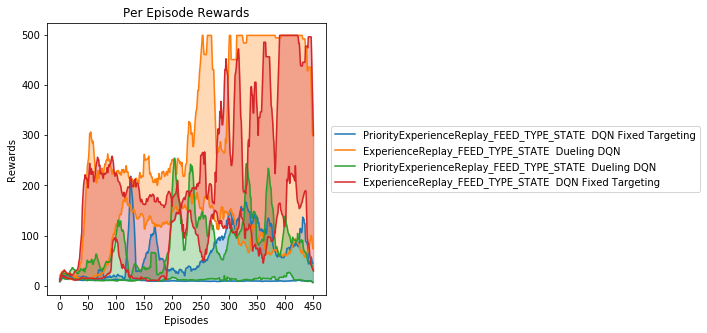

In [12]:
import os
model_dirs = ['data/cartpole_dueling dqn', 'data/cartpole_dqn fixed targeting']
group_interp = GroupAgentInterpretation()
for model_dir in model_dirs:
    for file in os.listdir(model_dir):
        file = file.replace('.pickle', '')
        group_interp.add_interpretation(GroupAgentInterpretation.from_pickle(model_dir, file))
group_interp.plot_reward_bounds(per_episode=True, smooth_groups=10)

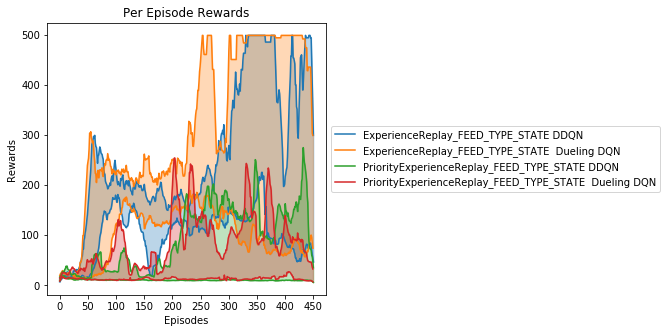

In [13]:
model_dirs = ['data/cartpole_dueling dqn', 'data/cartpole_ddqn']
group_interp_2 = GroupAgentInterpretation()
for model_dir in model_dirs:
    for file in os.listdir(model_dir):
        file = file.replace('.pickle', '')
        group_interp_2.add_interpretation(GroupAgentInterpretation.from_pickle(model_dir, file))
group_interp_2.plot_reward_bounds(per_episode=True, smooth_groups=10)
group_interp.add_interpretation(group_interp_2)

In [14]:
group_interp.analysis

,name,average,max,min,type
0,"(Dueling DQN, PriorityExperienceReplay_FEED_TY...",37.997111,137.1,11.7,reward
1,"(Dueling DQN, PriorityExperienceReplay_FEED_TY...",32.311973,82.8,9.1,reward
2,"(Dueling DQN, PriorityExperienceReplay_FEED_TY...",27.884035,131.6,5.9,reward
3,"(Dueling DQN, PriorityExperienceReplay_FEED_TY...",48.784701,254.5,9.5,reward
4,"(Dueling DQN, PriorityExperienceReplay_FEED_TY...",55.326164,243.4,9.7,reward
5,"(Dueling DQN, ExperienceReplay_FEED_TYPE_STATE...",258.565333,499.0,13.9,reward
6,"(Dueling DQN, ExperienceReplay_FEED_TYPE_STATE...",269.299778,499.0,16.0,reward
7,"(Dueling DQN, ExperienceReplay_FEED_TYPE_STATE...",154.370067,499.0,10.5,reward
8,"(Dueling DQN, ExperienceReplay_FEED_TYPE_STATE...",141.921508,252.6,10.2,reward
9,"(Dueling DQN, ExperienceReplay_FEED_TYPE_STATE...",168.225721,499.0,12.8,reward


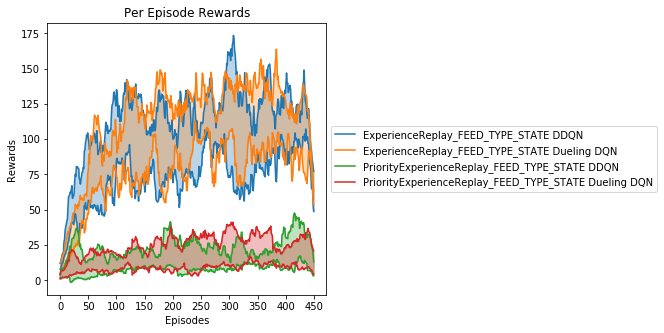

In [15]:
model_dirs = ['data/lunarlander_dueling dqn', 'data/lunarlander_ddqn']
group_interp_2 = GroupAgentInterpretation()
for model_dir in model_dirs:
    for file in os.listdir(model_dir):
        file = file.replace('.pickle', '')
        group_interp_2.add_interpretation(GroupAgentInterpretation.from_pickle(model_dir, file))
group_interp_2.plot_reward_bounds(per_episode=True, smooth_groups=20)
group_interp.add_interpretation(group_interp_2)